# monkey business

$$mP\left(mP\left(\left\lfloor \frac{mP(S_{i-1} \cdot 64)}{32} \right\rfloor\right) \cdot 2048\right)$$

where $mP(x)$ is defined as mixing and pruning
A `mix` is defined as the bitwise XOR of the $S_{i-1}$ and $x$.
A `prune`is defined as modulo $2^{24}$.

In [ ]:
import math

def next_secret(prev_secret):
    v = prune(mix(prev_secret, prev_secret * 64))
    v = prune(mix(v, math.floor(v / 32)))
    v = prune(mix(v, v * 2048))
    return v

# function for mixing and then pruning
def mix(secret: int, val: int):
    return secret ^ val

def prune(secret: int):
    return secret % 2**24

Price $p_i$ is defined as the ones digit of the secret number $S_{i}$

In [1]:
def price(secret: int):
    return secret % 10

assert price(123456) == 6, price(123456)
assert price(39) == 9, price(39)

We are interested in the changes in the price of the secret number $S_{i}$ as we iterate

In [2]:
secrets = [123]
for i in range(10):
    secrets.append(next_secret(secrets[-1]))

def price_deltas(prices):
    return [None] + [prices[i+1] - prices[i] for i in range(len(prices) - 1)]

prices = [price(secret) for secret in secrets]
deltas = price_deltas(prices)

assert prices == [3, 0, 6, 5, 4, 4, 6, 4, 4, 2, 4], prices
assert deltas == [None, -3, 6, -1, -1, 0, 2, -2, 0, -2, 2], deltas

NameError: name 'next_secret' is not defined

Our communication partner accepts four consecutive price changes as a signal to sell.

We want to maximize profit by finding the maximum possible price change in the sequence of price changes that is preceded by at least three other price changes.

In the example above, our prices are

$[3, 0, 6, 5, 4, 4, 6, 4, 4, 2, 4]$

The maximum possible price change in the sequence of price changes that is preceded by at least three other price changes is $6$, because:

$max(p_i) \mid i > 3 => 6$

We are interested in $i$ such that the subset $\{p_\Delta(k) \mid k \in [i-3, i]\}$ can be retrieved.


In [ ]:
def find_max_price_index(prices):
    return prices[3:].index(max(prices[3:])) + 3

max_price_index = find_max_price_index(prices)
assert max_price_index == 6, max_price_index

Given that we can only supply a single set of four price changes for _all_ monkeys, we need to actually optimize over all possible sets of four price changes for all monkeys

For all $S_{i}$, find $p_\Delta(k)$ such that $p_\Delta(k) = max(p_i) \mid i > 3$

It might help to visualize this as a graph where the x-axis is the index of the price change, and the y-axis is the price change itself

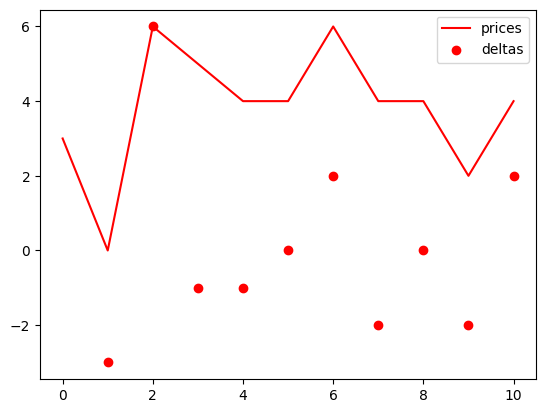

In [ ]:
import matplotlib.pyplot as plt

def rgb(index: int):
    # Get a colormap
    cmap = plt.get_cmap('hsv')  # You can choose any colormap you prefer
    # Normalize the index to be within the range 0-1
    normalized_index = index % cmap.N / cmap.N
    # Get the RGB values
    rgb = cmap(normalized_index)
    return rgb[:3]  # Return only the RGB values, ignore the alpha channel

def plot_prices(prices, deltas, n):
    x = range(len(prices))
    plt.plot(x, prices, label='prices', color=rgb(n))
    # plt.plot(x, deltas, label='deltas', color=(0, 0, 99/100))

    # scatter plot
    # plt.scatter(x, prices, label='prices', color=rgb(n))
    plt.scatter(x, deltas, label='deltas', color=rgb(n))

plot_prices(prices, deltas, 0)
plt.legend()
plt.show()

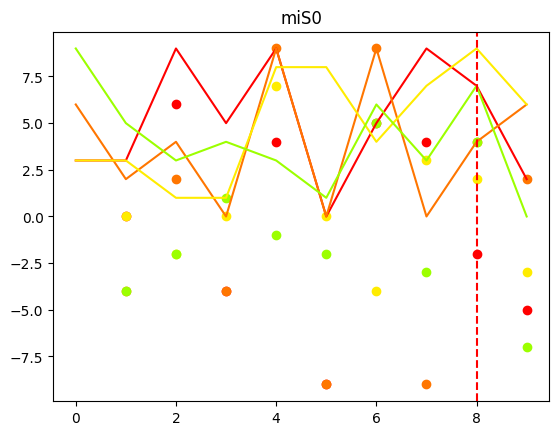

In [ ]:
mS0 = [1, 2, 3, 2024]

results = {}

for miS0 in mS0:
    # ith monkey's s0
    secrets = [miS0]
    for _ in range(10):
        secret = next_secret(secrets[-1])
        secrets.append(secret)

    results[miS0] = secrets[1:]

i = 0
for miS0, secrets in results.items():
    prices = [price(secret) for secret in secrets]
    deltas = price_deltas(prices)
    plot_prices(prices, deltas, i)
    i += 20

max_price_indices = {miS0: find_max_price_index([price(secret) for secret in secrets]) for miS0, secrets in results.items()}
# max of max
max_max_price_index = max(max_price_indices.values())

# plot vertical line at max_max_price_index
plt.axvline(x=max_max_price_index, color='r', linestyle='--')

plt.title(f'miS0')
plt.show()